In [ ]:
# Importando librerías más utilizadas para trabajar los datos 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier  
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

## 1. Revisión del dataset

In [10]:
df = pd.read_csv('../data/raw/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
nulos = df.isnull().sum()

columnas_con_nulos = nulos[nulos > 0]

if columnas_con_nulos.empty:
    print("sin nulos")
else:
    print(columnas_con_nulos)

sin nulos


In [13]:
target = df['HeartDisease'].value_counts()
print("Conteo de valores para la columna 'HeartDisease':")
print(target.sort_index())

Conteo de valores para la columna 'HeartDisease':
HeartDisease
0    410
1    508
Name: count, dtype: int64


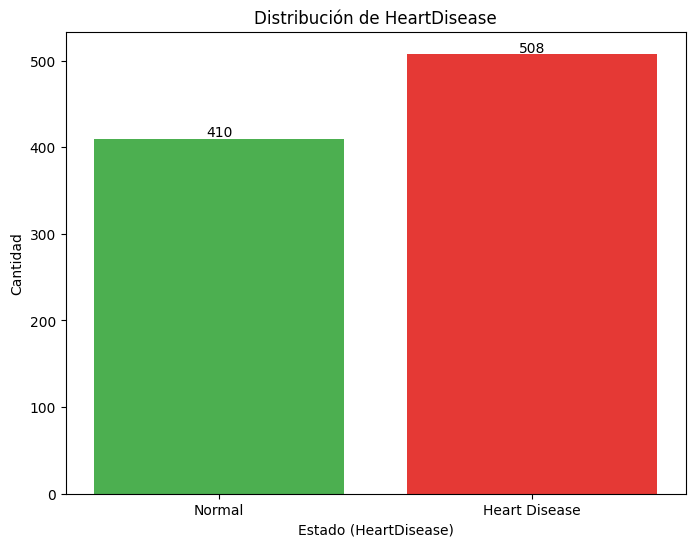

In [14]:
target = df['HeartDisease'].value_counts().sort_index()
labels = {0: 'Normal', 1: 'Heart Disease'}
x = target.index.astype(int)
x_labels = [labels[i] for i in x]

plt.figure(figsize=(8,6))
plt.bar(x, target.values, color=['#4CAF50', '#E53935'])
plt.xticks(x, x_labels)          
plt.xlabel('Estado (HeartDisease)')
plt.ylabel('Cantidad')
plt.title('Distribución de HeartDisease')

# Anotar valores
for i, v in enumerate(target.values):
    plt.text(x[i], v + 2, str(v), ha='center')

plt.show()

## 2. Separar y Escalar Datos

In [46]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('HeartDisease')
categorical_cols = df.select_dtypes(include=['object']).columns

target = df['HeartDisease']
numeric_features = df[numeric_cols]
categorical_feats = df[categorical_cols]

categorical_encoded = pd.get_dummies(categorical_feats, drop_first=True)
features = pd.concat([numeric_features, categorical_encoded], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=42,
    stratify=target
)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train_scaled

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
485,0.970012,0.339016,0.127137,1.835497,-0.324520,0.317046,True,True,False,False,False,True,True,True,False
486,0.122028,-1.266031,0.099443,1.835497,1.689837,-0.440356,True,True,False,False,False,True,False,False,True
117,0.546020,-0.159102,1.244113,1.835497,-0.247045,0.601071,False,False,False,False,False,True,True,True,False
361,-0.725956,1.501291,-1.876035,-0.544812,-0.479470,-0.819056,True,False,False,False,True,False,True,True,False
296,-0.407962,0.671094,-1.876035,1.835497,0.101594,-0.156330,True,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,-0.301964,0.117630,-0.399042,-0.544812,0.527708,1.074447,True,False,True,False,True,False,False,True,False
201,-0.831954,-0.712567,0.247142,-0.544812,0.527708,-0.819056,True,False,True,False,True,False,False,False,True
462,0.546020,-0.601874,0.274836,-0.544812,-0.750634,0.411721,True,False,False,False,True,False,True,False,False
252,0.758016,-0.435834,0.819477,-0.544812,-0.828109,-0.819056,True,False,False,False,False,True,True,False,True


## 3. Modelado y Evaluación 

In [47]:
'''Entrenamiento con Random Forest'''
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"F1: {f1_score(y_test, y_pred_rf):.3f}")
print(classification_report(y_test, y_pred_rf, digits=3))

Accuracy: 0.875
F1: 0.888
              precision    recall  f1-score   support

           0      0.864     0.854     0.859        82
           1      0.883     0.892     0.888       102

    accuracy                          0.875       184
   macro avg      0.874     0.873     0.873       184
weighted avg      0.875     0.875     0.875       184



In [ ]:
'''Entrenamiento Regresión Logística'''
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"F1: {f1_score(y_test, y_pred_lr):.3f}")
print(classification_report(y_test, y_pred_lr, digits=3))

=== Logistic Regression ===
Accuracy: 0.886
F1: 0.900
              precision    recall  f1-score   support

           0      0.907     0.829     0.866        82
           1      0.872     0.931     0.900       102

    accuracy                          0.886       184
   macro avg      0.889     0.880     0.883       184
weighted avg      0.887     0.886     0.885       184



In [45]:
'''Entrenamiento con XGBoost'''
xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=1.0,
    random_state=42,
    eval_metric="logloss"
)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.3f}")
print(f"F1: {f1_score(y_test, y_pred_xgb):.3f}")
print(classification_report(y_test, y_pred_xgb, digits=3))

Accuracy: 0.864
F1: 0.876
              precision    recall  f1-score   support

           0      0.835     0.866     0.850        82
           1      0.889     0.863     0.876       102

    accuracy                          0.864       184
   macro avg      0.862     0.864     0.863       184
weighted avg      0.865     0.864     0.864       184



In [29]:
'''Entrenamiento con SVM'''
svm_rbf = SVC(kernel="rbf", probability=True, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_svm = svm_rbf.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")
print(f"F1: {f1_score(y_test, y_pred_svm):.3f}")
print(classification_report(y_test, y_pred_svm, digits=3))

Accuracy: 0.886
F1: 0.899
              precision    recall  f1-score   support

           0      0.886     0.854     0.870        82
           1      0.886     0.912     0.899       102

    accuracy                          0.886       184
   macro avg      0.886     0.883     0.884       184
weighted avg      0.886     0.886     0.886       184



## 4. Mejorando el Modelo Escogido
